### Deteksi Tepi Menggunakan Operator Prewitt

In [1]:
#import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import math
%matplotlib inline

In [3]:
#read image grayscale
image = cv2.imread('knife.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [4]:
height, width, _ = rgb.shape
print(f"Ukuran gambar: {width} x {height}")

Ukuran gambar: 538 x 720


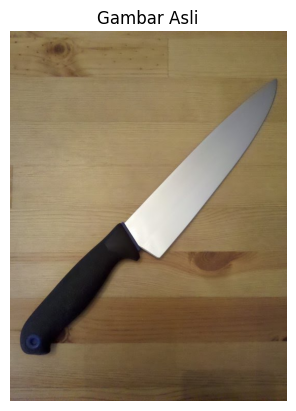

In [5]:
plt.imshow(rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

### Konversi Grayscale

In [6]:
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Rumus standar konversi RGB ke grayscale
    return gray

In [7]:
grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]  # Ambil pixel di koordinat (y,x)
        r, g, b = pixel
        gray = convert_to_grayscale(pixel)
        row.append(gray)

        # Menampilkan nilai piksel tiap 100 piksel sebagai sampel
        if y % 100 == 0 and x % 100 == 0:
            print(f'Pixel[{y},{x}] -> R: {r}, G: {g}, B: {b}, Gray: {gray}')
    grayscale_img.append(row)

Pixel[0,0] -> R: 130, G: 111, B: 81, Gray: 113
Pixel[0,100] -> R: 150, G: 130, B: 93, Gray: 131
Pixel[0,200] -> R: 147, G: 128, B: 88, Gray: 129
Pixel[0,300] -> R: 134, G: 109, B: 78, Gray: 112
Pixel[0,400] -> R: 133, G: 108, B: 67, Gray: 110
Pixel[0,500] -> R: 126, G: 102, B: 66, Gray: 105
Pixel[100,0] -> R: 145, G: 129, B: 96, Gray: 130
Pixel[100,100] -> R: 149, G: 133, B: 100, Gray: 134
Pixel[100,200] -> R: 149, G: 129, B: 94, Gray: 130
Pixel[100,300] -> R: 147, G: 125, B: 88, Gray: 127
Pixel[100,400] -> R: 140, G: 119, B: 74, Gray: 120
Pixel[100,500] -> R: 116, G: 100, B: 77, Gray: 102
Pixel[200,0] -> R: 157, G: 143, B: 116, Gray: 144
Pixel[200,100] -> R: 159, G: 143, B: 109, Gray: 143
Pixel[200,200] -> R: 168, G: 149, B: 109, Gray: 150
Pixel[200,300] -> R: 166, G: 144, B: 103, Gray: 145
Pixel[200,400] -> R: 152, G: 152, B: 154, Gray: 152
Pixel[200,500] -> R: 145, G: 124, B: 81, Gray: 125
Pixel[300,0] -> R: 136, G: 117, B: 85, Gray: 119
Pixel[300,100] -> R: 175, G: 155, B: 122, Gra

In [8]:
grayscale_img = np.array(grayscale_img, dtype=np.uint8)
grayscale_img

array([[113, 113, 113, ...,  94,  97,  97],
       [117, 117, 118, ...,  94,  92,  92],
       [119, 121, 120, ...,  97,  94,  94],
       ...,
       [113, 109, 106, ...,  56,  60,  60],
       [113, 112, 111, ...,  60,  62,  62],
       [112, 113, 114, ...,  61,  59,  59]], dtype=uint8)

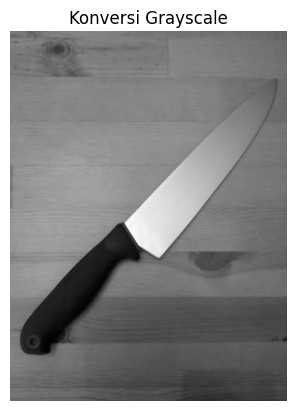

In [9]:
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Konversi Grayscale')
plt.show()

In [10]:
#kernel operator prewitt

Gx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
Gy = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

In [11]:
# Operasi Prewitt manual
def apply_prewitt_operator(img):
    gradient_magnitude = np.zeros((height, width), dtype=np.uint8)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            gx = 0
            gy = 0
            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]
                    gx += Gx[i][j] * pixel
                    gy += Gy[i][j] * pixel
            magnitude = math.sqrt(gx**2 + gy**2)
            gradient_magnitude[y, x] = min(int(magnitude), 255)

    return gradient_magnitude

edges = apply_prewitt_operator(grayscale_img)
edges = np.array(edges)
edges

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 21, 18, ...,  8,  3,  0],
       [ 0,  6,  3, ..., 21, 23,  0],
       ...,
       [ 0, 33, 30, ..., 15, 15,  0],
       [ 0, 13, 18, ..., 13,  5,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

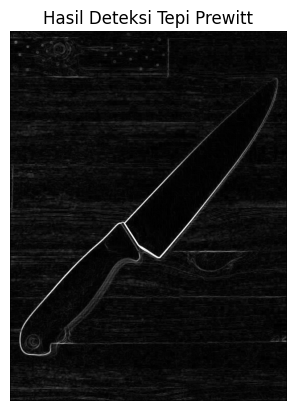

In [12]:
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Hasil Deteksi Tepi Prewitt')
plt.show()